In [1]:
# É necessário instalar o pyarrow para importar o arquivo de acervos que está em formato parquet
#!pip install pyarrow

In [2]:
# Importando as bibliotecas
import os 
import pandas as pd
import requests
import seaborn as sns
from bs4 import BeautifulSoup

In [3]:
# Utilizando BeautifulSoup para coletar o nome dos arquivos csv

# Url do repositório
url_repositorio = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/tree/main/Dia_1-Importando_dados/Datasets/dados_emprestimos?utm_source=ActiveCampaign&utm_medium=email&utm_content=%237DaysOfCode+-+Python+Pandas+1%2F7%3A+Importa%C3%A7%C3%A3o+de+dados&utm_campaign=%5BAlura+%237Days+Of+Code%5D%28Python+Pandas+-+1%C2%AA+Ed+%29+1%2F7'
# Extraindo o HTML utilizando a biblioteca requests
html_github = requests.get(url_repositorio).content
# Fazendo o parse do HTML com BeautifulSoup
soup = BeautifulSoup(html_github, 'html.parser')
# Extraindo todos os links do site
links_do_site = soup.find_all('a')
# Selecionando o texto dos links, quando este texto termina em .csv
arquivos = [arquivo.text for arquivo in links_do_site if arquivo.text.endswith('.csv')]

In [4]:
# Visualizando a lista de arquivos csv
arquivos

['emprestimos-20101.csv',
 'emprestimos-20102.csv',
 'emprestimos-20111.csv',
 'emprestimos-20112.csv',
 'emprestimos-20121.csv',
 'emprestimos-20122.csv',
 'emprestimos-20131.csv',
 'emprestimos-20132.csv',
 'emprestimos-20141.csv',
 'emprestimos-20142.csv',
 'emprestimos-20151.csv',
 'emprestimos-20152.csv',
 'emprestimos-20161.csv',
 'emprestimos-20162.csv',
 'emprestimos-20171.csv',
 'emprestimos-20172.csv',
 'emprestimos-20181.csv',
 'emprestimos-20182.csv',
 'emprestimos-20191.csv',
 'emprestimos-20192.csv',
 'emprestimos-20201.csv']

In [5]:
# Utilizando o módulo OS para concatenar a URL base com cada arquivo csv encontrado, para encontrar a URL raw
url_base = 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/'
lista_raw_urls = [os.path.join(url_base, arquivo) for arquivo in arquivos]

In [6]:
# Visualizando as URLs
lista_raw_urls

['https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20101.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20102.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20111.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20112.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20121.csv',
 'https://raw.githubusercontent.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/main/Dia_1-Importando_dados/Datasets/dados_emprestimos/emprestimos-20122.csv',
 'https://raw.githubus

In [7]:
# Agora com as URLs definidas, serão criados os dataframes usando a biblioteca pandas

# A função recebe a url e o dataframe gerado em cada iteração, e vai adicionando as linhas de cada um
def criarDataframe(url, dataframe = None):
    # Lê o novo dataframe
    novo_dataframe = pd.read_csv(url)
    
    # Se o parâmetro dataframe não for None, concatena com o dataframe anterior, senão retorna o próprio dataframe gerado
    if dataframe is not None:
        dataframe_concatenado = pd.concat([dataframe, novo_dataframe], axis = 0)
        return dataframe_concatenado
    else:
        return novo_dataframe

In [8]:
# dataframe inicializa como None
dataframe_emprestimos = None

# Em cada iteração, dataframe vai concatenando com o dataframe anterior
for url in lista_raw_urls:
    dataframe_emprestimos = criarDataframe(url, dataframe_emprestimos)

In [9]:
# Informações sobre o dataframe de empréstimos
dataframe_emprestimos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2258018 entries, 0 to 26560
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    float64
 6   tipo_vinculo_usuario  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 137.8+ MB


In [13]:
# Verificando se existem dados duplicados pelo id do empréstimo
dataframe_emprestimos[dataframe_emprestimos.duplicated()]

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO
5,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO
6,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO
7,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO
19,709698,2009047725,2010/01/18 14:44:41.163000000,2010/01/04 09:21:19.099000000,2010/02/02 12:02:38.444000000,2.009047e+09,ALUNO DE GRADUAÇÃO
20,709698,2009047725,2010/01/18 14:44:41.163000000,2010/01/04 09:21:19.099000000,2010/02/02 12:02:38.444000000,2.009047e+09,ALUNO DE GRADUAÇÃO
28,709704,2006021442,2010/01/17 18:56:43.923000000,2010/01/04 09:58:46.522000000,2010/02/01 13:59:02.528000000,2.008010e+09,ALUNO DE GRADUAÇÃO
29,709705,2009032168,2010/01/17 18:56:43.909000000,2010/01/04 09:58:46.549000000,2010/01/20 13:14:34.464000000,2.008010e+09,ALUNO DE GRADUAÇÃO
30,709704,2006021442,2010/01/17 18:56:43.923000000,2010/01/04 09:58:46.522000000,2010/02/01 13:59:02.528000000,2.008010e+09,ALUNO DE GRADUAÇÃO
31,709705,2009032168,2010/01/17 18:56:43.909000000,2010/01/04 09:58:46.549000000,2010/01/20 13:14:34.464000000,2.008010e+09,ALUNO DE GRADUAÇÃO


In [14]:
# Existem 145312 linhas duplicadas, que devem ser removidas
dataframe_emprestimos.drop_duplicates(inplace= True)

In [15]:
# Importando o arquivo com informações do acervo, que está em formato parquet
url_acervos = 'https://github.com/FranciscoFoz/7_Days_of_Code_Alura-Python-Pandas/raw/main/Dia_1-Importando_dados/Datasets/dados_exemplares.parquet'
dataframe_acervo = pd.read_parquet(url_acervos)

In [16]:
# Informações do dataframe de acervos
dataframe_acervo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 546237 entries, 0 to 568584
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id_exemplar       546237 non-null  int64 
 1   codigo_barras     546237 non-null  object
 2   colecao           546237 non-null  object
 3   biblioteca        546237 non-null  object
 4   status_material   546237 non-null  object
 5   localizacao       546237 non-null  int64 
 6   registro_sistema  546237 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 33.3+ MB


In [17]:
# Visualizando as primeiras linhas
dataframe_acervo.head(5)

,id_exemplar,codigo_barras,colecao,biblioteca,status_material,localizacao,registro_sistema
index,,,,,,,
0,5,L000003,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,694,1
1,4,L000002,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,688,1
2,3,L000001,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,638,1
3,7,L000114,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,616,5
5,10,L000041,Acervo Circulante,Biblioteca Central Zila Mamede,ESPECIAL,657,15


O dataframe acervos funciona como uma tabela dimensão para o dataframe empréstimos, que seria a tabela fato. No acervo constam informações a respeito do exemplar que foi emprestado. Para uma melhor análise, é preciso levar as informações do acervo para o dataframe de empréstimos.

In [18]:
''' Verificando se o dataframe_emprestimos contém alguma informação nula nos códigos de barras, pois é a coluna que será 
utilizada para o join '''
dataframe_emprestimos['codigo_barras'].isnull().sum()

0

In [19]:
# Como não existem valores nulos, basta realizar um join
dataframe_analise = dataframe_emprestimos.merge(dataframe_acervo, how='left', on='codigo_barras')

In [20]:
# Visualizando o dataframe gerado
dataframe_analise.head(5)

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,registro_sistema
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2.008023e+09,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,4225.0
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2.008023e+09,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,25009.0
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2.008112e+09,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,75019.0
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,2.007211e+08,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,44494.0
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2.009046e+09,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,91736.0


In [21]:
# Verificando se foram gerados dados nulos ao realizar o join
dataframe_analise.isnull().sum()

id_emprestimo                 0
codigo_barras                 0
data_renovacao          1287952
data_emprestimo               0
data_devolucao             6484
matricula_ou_siape         3171
tipo_vinculo_usuario          0
id_exemplar              189257
colecao                  189257
biblioteca               189257
status_material          189257
localizacao              189257
registro_sistema         189257
dtype: int64

In [22]:
# Foram gerados 183524 dados nulos. Provavelmente algum código não estava no acervo e deve ser verificado
codigos_barra_nao_encontrados = list(dataframe_analise[dataframe_analise['id_exemplar'].isnull()]['codigo_barras'].unique())
len(codigos_barra_nao_encontrados)

38540

Observa-se que existem 38540 códigos, resultando em 183524 linhas, que não foram encontrados no acervo. Isso pode ter ocorrido devido a algum erro de digitação do código, ou por um erro na atualização do acervo. Inicialmente, estes dados serão mantidos, mas dependendo da análise a ser feita, podem vir a ser retirados futuramente.

A coluna localizacao traz números decimais, que seguem o CDU (Classificação Decimal Universal), que é um sistema de classificação documentária para definir a classe de cada assunto, que segue a seguinte regra:
000 a 099: Generalidades. Ciência e conhecimento.
100 a 199: Filosofia e psicologia.
200 a 299: Religião.
300 a 399: Ciências sociais.
400 a 499: Classe vaga. Provisoriamente não ocupada.
500 a 599: Matemática e ciências naturais.
600 a 699: Ciências aplicadas.
700 a 799: Belas artes.
800 a 899: Linguagem. Língua. Linguística.
900 a 999: Geografia. Biografia. História.
Com isso, será definida uma coluna que contém a classe, de acordo com o CDU.

In [23]:
# Função que será usada para criar a coluna de classe
def definir_classe(localizacao):
    if localizacao >= 0  and localizacao < 100:
        return 'Generalidades. Ciência e conhecimento.'
    elif localizacao >= 100 and localizacao < 200:
        return 'Filosofia e psicologia.'
    elif localizacao >= 200 and localizacao < 300:
        return 'Religião.'
    elif localizacao >= 300 and localizacao < 400:
        return 'Ciências sociais.'
    elif localizacao >= 400 and localizacao < 500:
        return 'Classe vaga. Provisoriamente não ocupada.'
    elif localizacao >= 500 and localizacao < 600:
        return 'Matemática e ciências naturais.'
    elif localizacao >= 600 and localizacao < 700:
        return 'Ciências aplicadas.'
    elif localizacao >= 700 and localizacao < 800:
        return 'Belas artes.'
    elif localizacao >= 800 and localizacao < 900:
        return 'Linguagem. Língua. Linguística.'
    elif localizacao >= 900 and localizacao < 1000:
        return 'Geografia. Biografia. História.'
    else:
        return 'Classe não localizada.'
    
# Criando uma coluna no dataframe utilizando a função criada
dataframe_analise['classe'] = dataframe_analise['localizacao'].apply(definir_classe)

In [24]:
# Excluindo a coluna registro_sistema que não faz sentido para a análise
dataframe_analise.drop(columns = 'registro_sistema', inplace = True)

In [25]:
# Alterando o tipo da coluna matricula_ou_siape para string para melhorar a visualização
dataframe_analise['matricula_ou_siape'] = dataframe_analise['matricula_ou_siape'].astype(str)
# Retirando a casa decimal, que no caso da matrícula é irrelevante, já que é sempre .0
dataframe_analise['matricula_ou_siape'] = dataframe_analise['matricula_ou_siape'].apply(lambda x: x.replace('.0',''))

In [26]:
# Visualizando o dataframe alterado
dataframe_analise.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,classe
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265,ALUNO DE GRADUAÇÃO,13259.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630.0,Ciências aplicadas.
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265,ALUNO DE GRADUAÇÃO,70865.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647.0,Ciências aplicadas.
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114,ALUNO DE PÓS-GRADUAÇÃO,195347.0,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640.0,Ciências aplicadas.
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119,ALUNO DE GRADUAÇÃO,131639.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609.0,Ciências aplicadas.
4,709688,2007027500,2010/01/19 15:59:26.464000000,2010/01/04 08:27:33.569000000,2010/02/03 13:06:30.662000000,2009045971,ALUNO DE GRADUAÇÃO,225646.0,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,686.0,Ciências aplicadas.


In [27]:
# Informações do dataframe
dataframe_analise.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2261779 entries, 0 to 2261778
Data columns (total 13 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id_emprestimo         int64  
 1   codigo_barras         object 
 2   data_renovacao        object 
 3   data_emprestimo       object 
 4   data_devolucao        object 
 5   matricula_ou_siape    object 
 6   tipo_vinculo_usuario  object 
 7   id_exemplar           float64
 8   colecao               object 
 9   biblioteca            object 
 10  status_material       object 
 11  localizacao           float64
 12  classe                object 
dtypes: float64(2), int64(1), object(10)
memory usage: 241.6+ MB


In [28]:
# Convertendo as colunas de data para o formato datetime
dataframe_analise['data_renovacao'] = pd.to_datetime(dataframe_analise['data_renovacao'])
dataframe_analise['data_emprestimo'] = pd.to_datetime(dataframe_analise['data_emprestimo'])
dataframe_analise['data_devolucao'] = pd.to_datetime(dataframe_analise['data_devolucao'])

In [29]:
# Organizando as colunas que estava em formato float e na verdade funcionam melhor como string
dataframe_analise['id_exemplar'] = dataframe_analise['id_exemplar'].astype(str)
dataframe_analise['id_exemplar'] = dataframe_analise['id_exemplar'].apply(lambda x: x.replace('.0',''))
dataframe_analise['localizacao'] = dataframe_analise['localizacao'].astype(str)
dataframe_analise['localizacao'] = dataframe_analise['localizacao'].apply(lambda x: x.replace('.0',''))

In [30]:
# Verificando quantos exemplares foram emprestados por ano
dataframe_analise['ano_emprestimo'] = dataframe_analise['data_emprestimo'].apply(lambda x: x.year)

exemplares_por_ano = dataframe_analise[['ano_emprestimo', 'id_emprestimo']].groupby('ano_emprestimo').nunique()
exemplares_por_ano

,id_emprestimo
ano_emprestimo,
2010,196035
2011,229360
2012,250037
2013,259286
2014,235310
2015,224853
2016,225893
2017,229040
2018,202080


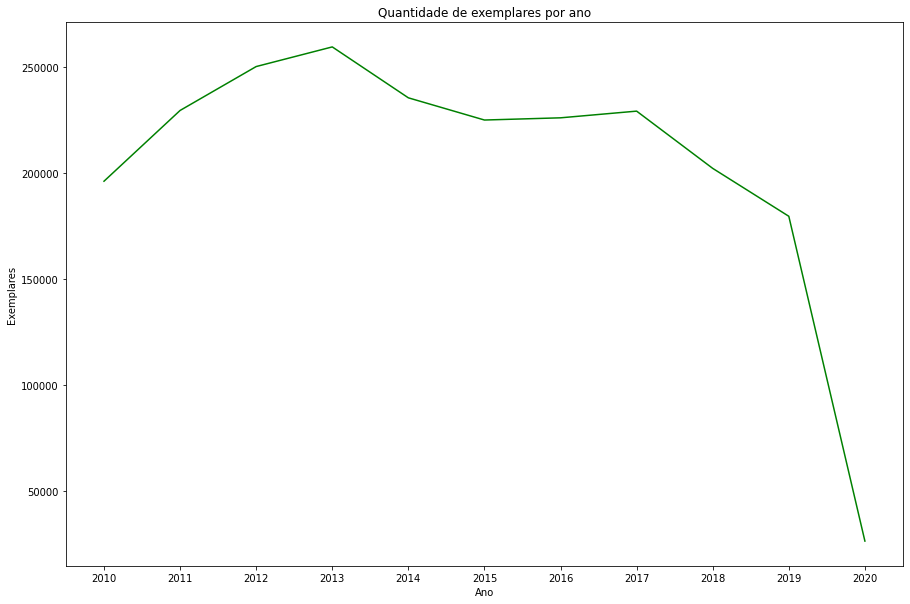

In [31]:
# Criando um gráfico de linhas para mostrar a quantidade de exemplares emprestados por ano
ax = sns.lineplot(data=exemplares_por_ano, x='ano_emprestimo', y='id_emprestimo', color='green')
ax.set_xlabel('Ano')
ax.set_ylabel('Exemplares')
ax.set_title('Quantidade de exemplares por ano')
ax.set_xticks(range(2010,2021))
ax.figure.set_size_inches(15,10)

Analisando o gráfico de empréstimos por ano, é possível notar uma tendência de baixa dos empréstimos com o passar dos anos. Houve um aumento até o ano de 2013, e após isso os números foram caindo.

In [32]:
# Verificando quantos empréstimos foram realizados por mês
dataframe_analise['mes_emprestimo'] = dataframe_analise['data_emprestimo'].apply(lambda x: x.month)

emprestimos_por_mes = dataframe_analise[['mes_emprestimo', 'id_emprestimo']].groupby('mes_emprestimo').nunique()
emprestimos_por_mes

,id_emprestimo
mes_emprestimo,
1,66791
2,205886
3,246266
4,208481
5,198909
6,133347
7,130611
8,252681
9,226791


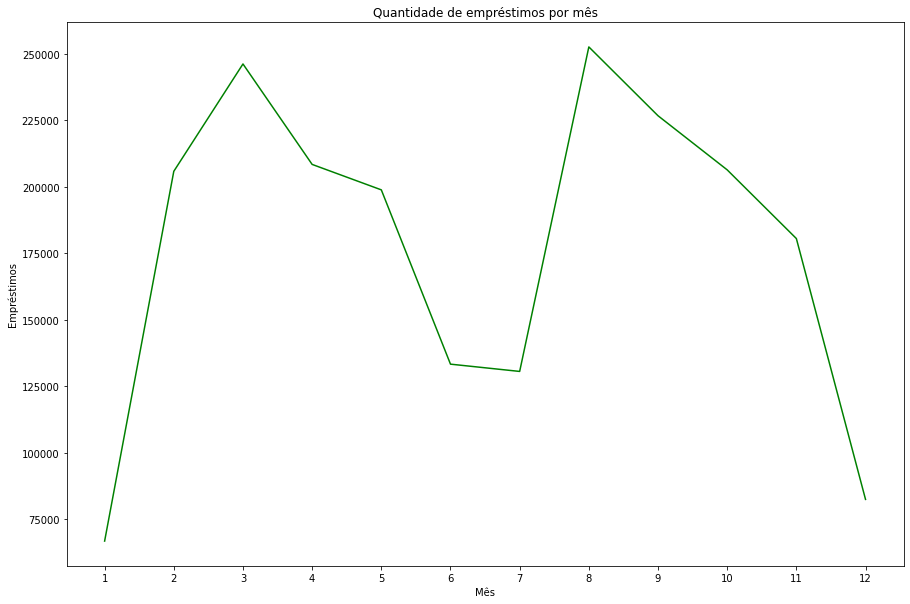

In [33]:
# Criando um gráfico de linhas para mostrar a quantidade de exemplares emprestados por mês
ax = sns.lineplot(data=emprestimos_por_mes, x='mes_emprestimo', y='id_emprestimo', color='green')
ax.set_xlabel('Mês')
ax.set_ylabel('Empréstimos')
ax.set_title('Quantidade de empréstimos por mês')
ax.set_xticks(range(1,13))
ax.figure.set_size_inches(15,10)

Analisando os empréstimos de forma mensal, verifica-se que há picos nos meses de março e agosto, com uma redução significativa em junho, julho, dezembro e janeiro, provavelmente devido ao período de férias escolares.

In [34]:
# Verificando os horários dos empréstimos
dataframe_analise['hora_emprestimo'] = dataframe_analise['data_emprestimo'].apply(lambda x: x.hour)

emprestimos_por_horario = dataframe_analise[['hora_emprestimo', 'id_emprestimo']].groupby('hora_emprestimo').nunique()
emprestimos_por_horario

,id_emprestimo
hora_emprestimo,
0,61
6,18
7,20361
8,107018
9,135513
10,189011
11,179174
12,147282
13,127996


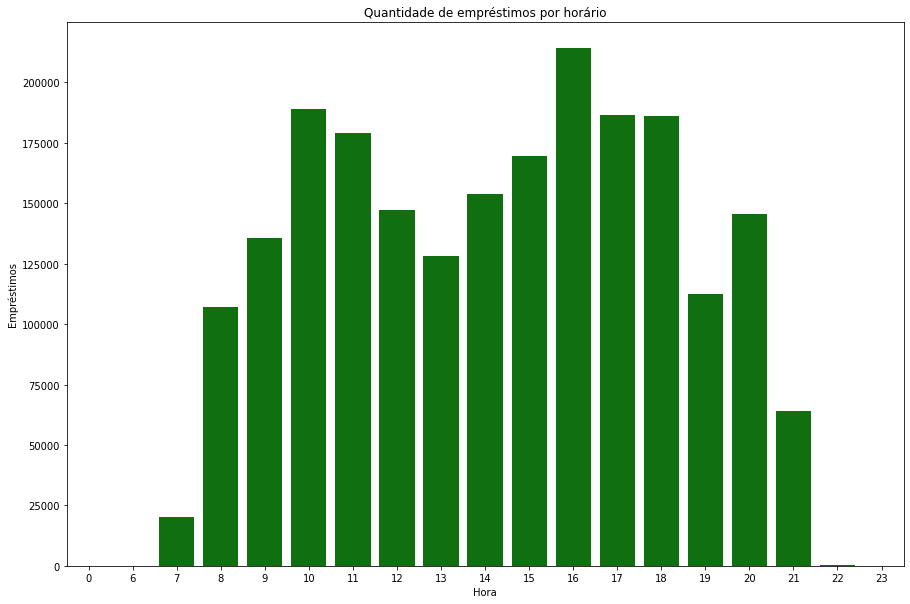

In [36]:
# Criando um gráfico de linhas para mostrar a quantidade de empréstimos por hora
ax = sns.barplot(data=emprestimos_por_horario, x=emprestimos_por_horario.index, y='id_emprestimo', color='green')
ax.set_xlabel('Hora')
ax.set_ylabel('Empréstimos')
ax.set_title('Quantidade de empréstimos por horário')
ax.figure.set_size_inches(15,10)

Analisando o gráfico de empréstimos por horário, verifica-se que a grande maioria dos empréstimos é feita por volta das 10:00 e entre 15:00 e 18:00. Outras atividades que não sejam de atendimento ao usuário poderiam ser realizadas antes das 9:00, por volta das 13:00 e após as 18:00 para um melhor aproveitamento.

In [80]:
# A função cria uma tabela de frequência para explorar as variáveis categóricas
def criar_tabela_frequencia(dataframe, variavel_analisada):
    analise = dataframe[['id_emprestimo', variavel_analisada]]
    emprestimos_por_variavel = analise.groupby(variavel_analisada).count()
    emprestimos_por_variavel['frequencia (%)'] = round((emprestimos_por_variavel['id_emprestimo']/
                                                        emprestimos_por_variavel['id_emprestimo'].sum()) * 100, 2)
    return emprestimos_por_variavel.sort_values('frequencia (%)', ascending = False)

In [81]:
# Criando as tabelas de frequência que interessam para a análise
emprestimos_por_tipo_de_vinculo = criar_tabela_frequencia(dataframe_analise, 'tipo_vinculo_usuario')
emprestimos_por_colecao = criar_tabela_frequencia(dataframe_analise, 'colecao')
emprestimos_por_biblioteca = criar_tabela_frequencia(dataframe_analise, 'biblioteca')
emprestimos_por_classe_cdu = criar_tabela_frequencia(dataframe_analise, 'classe')

Com as tabelas geradas, é possível realizar algumas análises individualmente:

In [82]:
# Empréstimos por tipo de vínculo
emprestimos_por_tipo_de_vinculo

,id_emprestimo,frequencia (%)
tipo_vinculo_usuario,,
ALUNO DE GRADUAÇÃO,1771903,78.34
ALUNO DE PÓS-GRADUAÇÃO,320074,14.15
DOCENTE,78285,3.46
SERVIDOR TÉCNICO-ADMINISTRATIVO,34178,1.51
ALUNO MÉDIO/TÉCNICO,29986,1.33
DOCENTE EXTERNO,24606,1.09
USUÁRIO EXTERNO,2741,0.12
OUTROS,6,0.00


Verifica-se que predominantemente alunos de graduação são os que mais utilizam as bibliotecas, seguidos por alunos de pós-graduação. Os outros públicos representam menos de 5% dos empréstimos realizados.

In [83]:
# Empréstimos por coleção
emprestimos_por_colecao

,id_emprestimo,frequencia (%)
colecao,,
Acervo Circulante,2053120,99.06
Multimeios,7954,0.38
Monografias,4021,0.19
Dissertações,2406,0.12
Obras de Referência,1954,0.09
Publicações da UFRN,764,0.04
Publicações de Autores do RN,866,0.04
Teses,714,0.03
Folhetos,271,0.01


No caso das coleções, verifica-se que mais de 99% dos empréstimos consistem no acervo circulante, de forma que as outras coleções possuem números praticamente insignificantes.

In [84]:
# Empréstimos por biblioteca
emprestimos_por_biblioteca

,id_emprestimo,frequencia (%)
biblioteca,,
Biblioteca Central Zila Mamede,1426122,68.81
Biblioteca Setorial do Centro Ciências da Saúde - CCS,118614,5.72
Biblioteca Setorial da Faculdade de Ciências da Saúde do Trairi - FACISA - Santa Cruz,77609,3.74
Biblioteca Setorial Prof. Alberto Moreira Campos - ­Departamento de Odontologia,66447,3.21
Biblioteca Setorial Profª. Maria Lúcia da Costa Bezerra - ­CERES­ - Caicó,61478,2.97
Biblioteca Setorial Bertha Cruz Enders - ­Escola de Saúde da UFRN - ESUFRN,46040,2.22
"Biblioteca Setorial do Centro de Ciências Humanas, Letras e Artes - CCHLA",40744,1.97
Biblioteca Setorial Dr. Paulo Bezerra - EMCM/RN - Caicó,32097,1.55
Biblioteca Setorial Profª. Maria José Mamede Galvão - FELCS - Currais Novos,29089,1.40


In [78]:
# Número de bibliotecas
len(emprestimos_por_biblioteca)

22

A Biblioteca Central Zila Mamede representa 69% dos empréstimos realizados pela universidade e os outros 31% dos empréstimos estão distribuídos entre as outras 21 bibliotecas existentes. Valeria uma análise pela universidade se realmente vale a pena manter os custos de tantas bibliotecas, sendo que a quantidade de empréstimos está centralizada em sua maior parte em uma única biblioteca.
Como as outras bibliotecas são setoriais, é necessário entender a distância da biblioteca central e o público atendido por cada uma destas bibliotecas para avaliar a real necessidade e contribuição de cada biblioteca. Outra variável que deve ser analisada, é quando estas bibliotecas foram inauguradas, para entender os números de forma mais clara.

In [85]:
# Empréstimos por classe CDU
emprestimos_por_classe_cdu

,id_emprestimo,frequencia (%)
classe,,
Ciências aplicadas.,1425473,63.02
Ciências sociais.,369536,16.34
Classe não localizada.,189257,8.37
Matemática e ciências naturais.,68744,3.04
Generalidades. Ciência e conhecimento.,62521,2.76
Religião.,62295,2.75
Filosofia e psicologia.,60563,2.68
Belas artes.,7911,0.35
Geografia. Biografia. História.,7989,0.35


Em relação às classes dos materiais emprestados, ciências aplicadas representam mais da metade dos empréstimos, seguida por ciências sociais. Classe não localizada podem ser possíveis erros de preenchimento e representam apenas 8% da base. Com estes dados, a universidade pode analisar o motivo de haverem poucos empréstimos relacionados às outras disciplinas.
Um dos motivos pode ser uma maior concentração de disciplinas relacionadas à ciências aplicadas e ciências sociais na grade da universidade, ou uma cultura diferenciada e voltada à livros dos professores destas disciplinas.